In [1]:
pip install bertopic

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.6/150.6 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 99.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli

In [2]:
# Import necessary libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from bertopic import BERTopic

In [3]:
pip show bertopic

Name: bertopic
Version: 0.17.0
Summary: BERTopic performs topic Modeling with state-of-the-art transformer models.
Home-page: https://github.com/MaartenGr/BERTopic
Author: 
Author-email: "Maarten P. Grootendorst" <maartengrootendorst@gmail.com>
License: MIT License

Copyright (c) 2024, Maarten P. Grootendorst

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIE

In [ ]:
df = pd.read_csv('../datasets/news_dataset.csv')
df.head()

unique_id    outlet                                           headline  \
0  39e6104d56    CBC.ca  Tij Iginla embraces family name, eager to foll...   
1  89ce50166b    CBC.ca     The Sunday Magazine for June 23, 2024 - CBC.ca   
2  8b320e107e  CBC News  Conservative MP shares inaccurate, ChatGPT-gen...   
3  7536f87654    CBC.ca  Women's sports are more popular than ever, but...   
4  c829d1f9a8    CBC.ca           June 22: Listener Question Show - CBC.ca   

                  url                                       article_text  \
0  https://www.cbc.ca  Tij Iginla doesn't shy away from his famous la...   
1  https://www.cbc.ca  This week on The Sunday Magazine with host Piy...   
2  https://www.cbc.ca  An Ontario Conservative MP's use of ChatGPT to...   
3  https://www.cbc.ca  When it comes to the study of sports, a man's ...   
4  https://www.cbc.ca  To wrap up the 48th season of Quirks & Quarks,...   

                    image              nlp_label        nlp-image_label  
0  images/39e6104d56.jpeg      Likely to be Bias  Likely to be Unbiased  
1  images/89ce50166b.jpeg      Likely to be Bias  Likely to be Unbiased  
2  images/8b320e107e.jpeg      Likely to be Bias      Likely to be Bias  
3  images/7536f87654.jpeg  Likely to be Unbiased  Likely to be Unbiased  
4  images/c829d1f9a8.jpeg      Likely to be Bias  Likely to be Unbiased

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40945 entries, 0 to 40944
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   unique_id        40945 non-null  object
 1   outlet           40945 non-null  object
 2   headline         40945 non-null  object
 3   url              40945 non-null  object
 4   article_text     40945 non-null  object
 5   image            40945 non-null  object
 6   nlp_label        40945 non-null  object
 7   nlp-image_label  40945 non-null  object
dtypes: object(8)
memory usage: 2.5+ MB


In [11]:
df = df.drop(columns=['image', 'nlp-image_label'])
df.head()

unique_id    outlet                                           headline  \
0  39e6104d56    CBC.ca  Tij Iginla embraces family name, eager to foll...   
1  89ce50166b    CBC.ca     The Sunday Magazine for June 23, 2024 - CBC.ca   
2  8b320e107e  CBC News  Conservative MP shares inaccurate, ChatGPT-gen...   
3  7536f87654    CBC.ca  Women's sports are more popular than ever, but...   
4  c829d1f9a8    CBC.ca           June 22: Listener Question Show - CBC.ca   

                  url                                       article_text  \
0  https://www.cbc.ca  Tij Iginla doesn't shy away from his famous la...   
1  https://www.cbc.ca  This week on The Sunday Magazine with host Piy...   
2  https://www.cbc.ca  An Ontario Conservative MP's use of ChatGPT to...   
3  https://www.cbc.ca  When it comes to the study of sports, a man's ...   
4  https://www.cbc.ca  To wrap up the 48th season of Quirks & Quarks,...   

               nlp_label  
0      Likely to be Bias  
1      Likely to be Bias  
2      Likely to be Bias  
3  Likely to be Unbiased  
4      Likely to be Bias

In [12]:
#lowercase
df['article_text'] = df['article_text'].apply(lambda x: x.lower())

In [13]:
# remove punctuation
import re

def remove_punctuation(text):
    return re.sub(r'[^\w\s]', '', text)

df['article_text'] = df['article_text'].apply(remove_punctuation)

In [14]:
# Preprocessing: Combine headline and article_text for topic modeling
df['combined_text'] = df['headline'] + " " + df['article_text']

# Handle missing values
df['combined_text'] = df['combined_text'].fillna("")

In [15]:
# Initialize TF-IDF vectorizer for feature extraction
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['combined_text'])

In [16]:
# Initialize BERTopic model
topic_model = BERTopic(verbose=True)

# Fit BERTopic model to the TF-IDF matrix
topics, probs = topic_model.fit_transform(df['combined_text'])

# Add topics to the dataframe
df['topic'] = topics

2025-03-30 07:20:26,280 - BERTopic - Embedding - Transforming documents to embeddings.


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/1280 [00:00<?, ?it/s]

2025-03-30 07:23:15,755 - BERTopic - Embedding - Completed ✓
2025-03-30 07:23:15,756 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-03-30 07:24:24,502 - BERTopic - Dimensionality - Completed ✓
2025-03-30 07:24:24,504 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-03-30 07:24:32,431 - BERTopic - Cluster - Completed ✓
2025-03-30 07:24:32,448 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-03-30 07:24:47,509 - BERTopic - Representation - Completed ✓


In [ ]:
df.to_csv("..datasets/generated/framing_analysis_topics.csv", index=False)

In [18]:
topic_model.visualize_topics()

In [26]:
# Display top words per topic
print(topic_model.get_topic_info())

     Topic  Count                                     Name  \
0       -1  12713                         -1_the_in_of_and   
1        0    572           0_secret_crooks_rally_shooting   
2        1    486   1_settings_cookies_your_advertisements   
3        2    336        2_climate_energy_emissions_carbon   
4        3    323                 3_harris_kamala_her_vice   
..     ...    ...                                      ...   
647    646     10  646_confederate_statue_monuments_slaves   
648    647     10      647_antidoping_wada_swimmers_doping   
649    648     10      648_plouffe_canada_basketball_spain   
650    649     10            649_a350_cathay_engine_airbus   
651    650     10         650_pcls_target_dividend_analyst   

                                        Representation  \
0       [the, in, of, and, is, to, that, for, it, was]   
1    [secret, crooks, rally, shooting, assassinatio...   
2    [settings, cookies, your, advertisements, devi...   
3    [climate, energy, 

In [24]:
# Rename topic -1 to "Uncategorized"
topic_mapping[-1] = "Uncategorized"

In [34]:
df = pd.read_csv('/content/drive/MyDrive/IS450 Group 5/zara/framing_analysis_topics.csv')
df.head()

unique_id    outlet                                           headline  \
0  39e6104d56    CBC.ca  Tij Iginla embraces family name, eager to foll...   
1  89ce50166b    CBC.ca     The Sunday Magazine for June 23, 2024 - CBC.ca   
2  8b320e107e  CBC News  Conservative MP shares inaccurate, ChatGPT-gen...   
3  7536f87654    CBC.ca  Women's sports are more popular than ever, but...   
4  c829d1f9a8    CBC.ca           June 22: Listener Question Show - CBC.ca   

                  url                                       article_text  \
0  https://www.cbc.ca  tij iginla doesnt shy away from his famous las...   
1  https://www.cbc.ca  this week on the sunday magazine with host piy...   
2  https://www.cbc.ca  an ontario conservative mps use of chatgpt to ...   
3  https://www.cbc.ca  when it comes to the study of sports a mans bo...   
4  https://www.cbc.ca  to wrap up the 48th season of quirks  quarks w...   

               nlp_label                                      combined_text  \
0      Likely to be Bias  Tij Iginla embraces family name, eager to foll...   
1      Likely to be Bias  The Sunday Magazine for June 23, 2024 - CBC.ca...   
2      Likely to be Bias  Conservative MP shares inaccurate, ChatGPT-gen...   
3  Likely to be Unbiased  Women's sports are more popular than ever, but...   
4      Likely to be Bias  June 22: Listener Question Show - CBC.ca to wr...   

   topic  
0    284  
1    503  
2    110  
3    550  
4     -1

In [35]:
# Get topic frequency
topic_info = topic_model.get_topic_info()

# Display the top 10 most common topics (excluding -1)
top_topics = topic_info[topic_info['Topic'] != -1].head(10)
print(top_topics)

    Topic  Count                                            Name  \
1       0    572                  0_secret_crooks_rally_shooting   
2       1    486          1_settings_cookies_your_advertisements   
3       2    336               2_climate_energy_emissions_carbon   
4       3    323                        3_harris_kamala_her_vice   
5       4    318                     4_labour_starmer_seats_keir   
6       5    305               5_ai_openai_artificial_generative   
7       6    293                            6_wedding_my_her_mom   
8       7    272                       7_hunter_gun_trial_bidens   
9       8    270  8_politico_playbook_realclearpolitics_desantis   
10      9    262                           9_macron_le_rn_france   

                                       Representation  \
1   [secret, crooks, rally, shooting, assassinatio...   
2   [settings, cookies, your, advertisements, devi...   
3   [climate, energy, emissions, carbon, gas, wind...   
4   [harris, kamala, he

In [36]:
# Get top words for each topic
for topic_id in top_topics["Topic"]:
    print(f"\nTopic {topic_id}: {topic_model.get_topic(topic_id)}")


Topic 0: [('secret', np.float64(0.015241447014525839)), ('crooks', np.float64(0.013182303757727639)), ('rally', np.float64(0.00957561692640036)), ('shooting', np.float64(0.008843016078206036)), ('assassination', np.float64(0.008793937554430607)), ('service', np.float64(0.008785582965264622)), ('cheatle', np.float64(0.008295817290736134)), ('butler', np.float64(0.007050556627135551)), ('shooter', np.float64(0.006567769444997319)), ('attempt', np.float64(0.006142639991542867))]

Topic 1: [('settings', np.float64(0.03280810069872243)), ('cookies', np.float64(0.03267217237827811)), ('your', np.float64(0.024036115991372297)), ('advertisements', np.float64(0.023732322832722943)), ('device', np.float64(0.023172949808085864)), ('services', np.float64(0.022791311873338518)), ('visit', np.float64(0.02254515455373652)), ('browser', np.float64(0.021231918459015738)), ('thirdparty', np.float64(0.020642043835110147)), ('privacy', np.float64(0.020322245902960907))]

Topic 2: [('climate', np.float64(

In [37]:
# Get topic names (labels) automatically generated by BERTopic
topic_info = topic_model.get_topic_info()

# Get the topic labels automatically generated by BERTopic
topic_labels = {}
for topic_id in topic_info['Topic']:
    # Get the top words for the topic
    topic_keywords = topic_model.get_topic(topic_id)
    topic_name = " ".join([word[0] for word in topic_keywords[:10]])  # Use top 10 words as the name
    topic_labels[topic_id] = topic_name

# Print the labels for topics
for topic_id, topic_name in topic_labels.items():
    print(f"Topic {topic_id}: {topic_name}")

Topic -1: the in of and is to that for it was
Topic 0: secret crooks rally shooting assassination service cheatle butler shooter attempt
Topic 1: settings cookies your advertisements device services visit browser thirdparty privacy
Topic 2: climate energy emissions carbon gas wind electricity fossil oil solar
Topic 3: harris kamala her vice democratic she president clinton women nominee
Topic 4: labour starmer seats keir lib conservatives party tories tory election
Topic 5: ai openai artificial generative google intelligence models technology chatgpt tech
Topic 6: wedding my her mom parents newsweek kids she husband baby
Topic 7: hunter gun trial bidens biden son charges weiss addiction delaware
Topic 8: politico playbook realclearpolitics desantis billboard associated conway pm real clear
Topic 9: macron le rn france french macrons pen frances nfp farright
Topic 10: walz minnesota tim governor walzs mate harris running gov kamala
Topic 11: milwaukee convention rnc edt republican pm tr

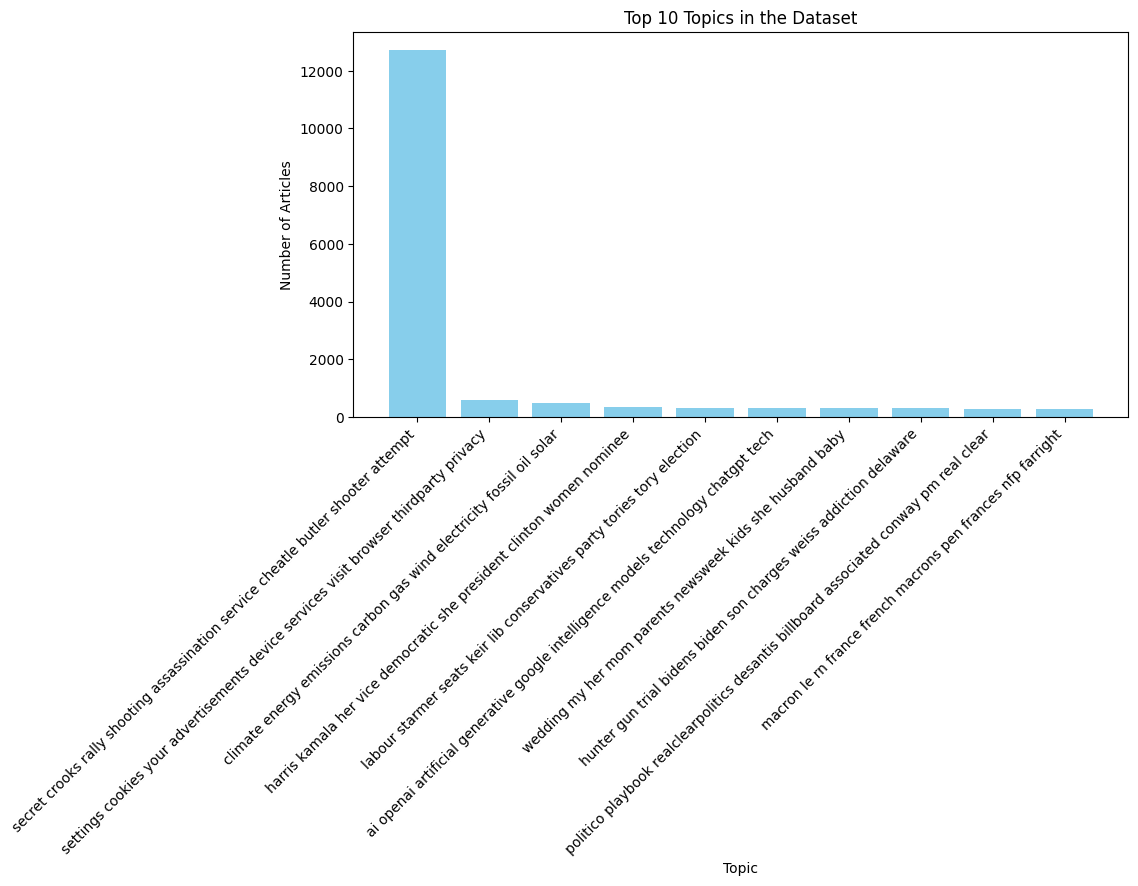

In [38]:
# Plotting with automatically generated topic names
plt.figure(figsize=(10, 5))

# Get the topic counts for the top topics
top_topic_counts = topic_info.nlargest(10, 'Count')["Count"]

# Get the labels for the top topics based on the generated names
top_topic_labels = [topic_labels.get(topic, f"Topic {topic}") for topic in top_topic_counts.index]

plt.bar(top_topic_labels, top_topic_counts, color="skyblue")
plt.xlabel("Topic")
plt.ylabel("Number of Articles")
plt.title(f"Top {top_n} Topics in the Dataset")
plt.xticks(rotation=45, ha="right")  # Rotate labels for readability
plt.show()

In [39]:
# Get topic names from BERTopic
topic_info = topic_model.get_topic_info()  # Get topic details
topic_mapping = dict(zip(topic_info['Topic'], topic_info['Name']))  # Map topic number → name

# Check if the topic_mapping is correct
print("Topic Mapping:")
print(topic_mapping)

# Replace topic numbers with their names in the dataframe
df['topic_name'] = df['topic'].map(topic_mapping)

# Check if the mapping is done correctly
print("\nDataframe with Topic Names:")
print(df[['unique_id', 'outlet', 'topic', 'topic_name']].head())

# Recalculate distributions with named topics
outlet_topic_distribution = df.groupby('outlet')['topic_name'].value_counts(normalize=True).unstack()
bias_topic_distribution = df.groupby('nlp_label')['topic_name'].value_counts(normalize=True).unstack()

# Check the distributions
print("\nOutlet Topic Distribution:")
print(outlet_topic_distribution.head())
print("\nBias Topic Distribution:")
print(bias_topic_distribution.head())

# Convert to long format for Plotly
outlet_topic_long = outlet_topic_distribution.reset_index().melt(id_vars="outlet", var_name="topic", value_name="proportion")
bias_topic_long = bias_topic_distribution.reset_index().melt(id_vars="nlp_label", var_name="topic", value_name="proportion")

# Check the long format data
print("\nOutlet Topic Long Format Data:")
print(outlet_topic_long.head())
print("\nBias Topic Long Format Data:")
print(bias_topic_long.head())

# Interactive stacked bar chart for outlets
fig_outlet = px.bar(outlet_topic_long,
                    x="outlet", y="proportion", color="topic",
                    title="Topic Distribution Across Outlets",
                    labels={"proportion": "Proportion of Topics", "outlet": "News Outlet", "topic": "Topic Name"},
                    barmode="stack")

fig_outlet.update_layout(xaxis={'categoryorder':'total descending'})  # Sort for clarity
fig_outlet.show()

# Interactive stacked bar chart for bias labels
fig_bias = px.bar(bias_topic_long,
                  x="nlp_label", y="proportion", color="topic",
                  title="Topic Distribution Across Bias Labels",
                  labels={"proportion": "Proportion of Topics", "nlp_label": "Bias Label", "topic": "Topic Name"},
                  barmode="stack")

fig_bias.update_layout(xaxis={'categoryorder':'total descending'})  # Sort for clarity
fig_bias.show()

Topic Mapping:
{-1: '-1_the_in_of_and', 0: '0_secret_crooks_rally_shooting', 1: '1_settings_cookies_your_advertisements', 2: '2_climate_energy_emissions_carbon', 3: '3_harris_kamala_her_vice', 4: '4_labour_starmer_seats_keir', 5: '5_ai_openai_artificial_generative', 6: '6_wedding_my_her_mom', 7: '7_hunter_gun_trial_bidens', 8: '8_politico_playbook_realclearpolitics_desantis', 9: '9_macron_le_rn_france', 10: '10_walz_minnesota_tim_governor', 11: '11_milwaukee_convention_rnc_edt', 12: '12_bank_ackman_firms_financial', 13: '13_border_immigration_asylum_migrants', 14: '14_debate_debates_biden_presidential', 15: '15_vance_jd_vances_ohio', 16: '16_campus_university_students_columbia', 17: '17_police_shooting_murder_fortson', 18: '18_books_book_novel_fiction', 19: '19_cannon_classified_documents_judge', 20: '20_cookies_site_these_allow', 21: '21_biden_democrats_democratic_bidens', 22: '22_dnc_convention_obama_chicago', 23: '23_olympic_medal_paris_olympics', 24: '24_reeves_tax_chancellor_labou